In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
adidas = pd.read_excel("Adidas US Sales Datasets.xlsx")

In [9]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


Renaming columns to make python queries easier

In [10]:
adidas.rename(columns={'Retailer ID' : 'Retailer_ID','Invoice Date':'Invoice_Date','Price per Unit':'Price_per_Unit',
'Units Sold':'Units_Sold','Total Sales':'Total_Sales','Operating Profit':'Operating_Profit','Operating Margin':'Operating_Margin',
'Sales Method':'Sales_Method'},inplace=True)

In [11]:
adidas.head(2)

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store


In [12]:
rank_total_region= adidas.groupby('Region').Total_Sales.sum().sort_values(ascending=False)

C:\Users\chimb\AppData\Local\Temp\ipykernel_64608\2677684044.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


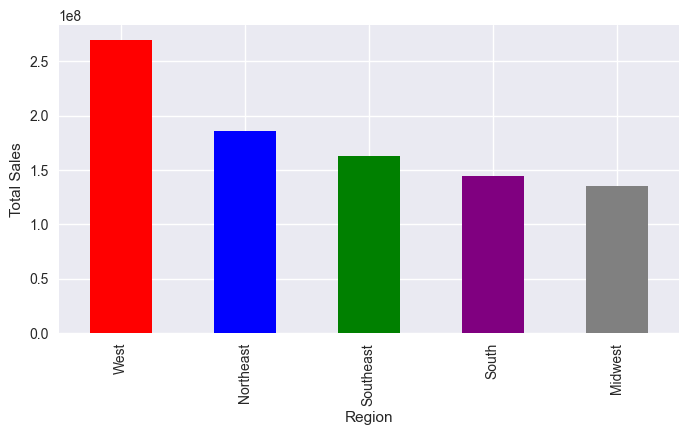

In [13]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn')
couleurs = ['red', 'blue', 'green', 'purple','grey']
rank_total_region.plot(kind='bar',color=couleurs)
plt.ylabel('Total Sales')
plt.show()

let's encode the non numerical columns to run some corrolation method on the dataset.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of original df
adidas_encoded = adidas.copy()

# Create LabelEncoder
label_encoder = LabelEncoder()

# Encoding every 'object' attributes for corr()
for col in adidas_encoded.columns:
    if adidas_encoded[col].dtype == 'object':  # Vérifiez si la colonne est catégorielle
        adidas_encoded[col] = label_encoder.fit_transform(adidas_encoded[col])

In [15]:
adidas.columns

Index(['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City',
       'Product', 'Price_per_Unit', 'Units_Sold', 'Total_Sales',
       'Operating_Profit', 'Operating_Margin', 'Sales_Method'],
      dtype='object')

In [26]:
heat = adidas_encoded.corr('spearman')[['Units_Sold','Total_Sales','Operating_Profit','Operating_Margin']]

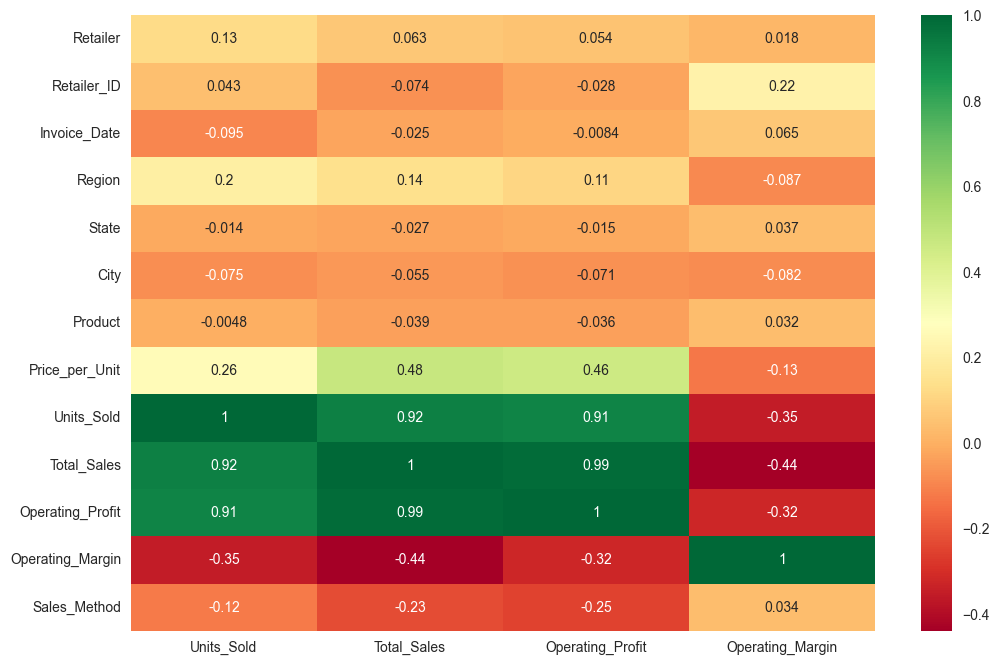

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(heat,annot=True,cmap='RdYlGn')
plt.show()

We can see that the region has some solid impact on the amount of units sold with a corrolation factor of 0.2, as well as the retailer (corrolation factor of 0.13), the sales method (corrolation factor of 0.12) and of course the price per units (corrolation factor of 0.26).

When it comes to operating profit, the price per unit has one of the most impact with a corrolation factor of 0.46, and the sales method also have a strong link with a corrolation factor of -0.25.

When it comes to operating margin, the attributes with the most impact apart from logic ones (such as margin, profit,sales, unit) is the retailer with a corrolation factor of 0.22.

__To conclude__

Firstly, concerning unit sales, we observed that the region in which Adidas operates plays a significant role. This suggests that regional factors, such as local market dynamics and consumer preferences, can impact the number of units sold. Additionally, the retailer and sales method also exhibit some influence. Moreover, the price per unit displayed a moderately positive correlation, indicating that pricing strategies can affect unit sales.

Moving on to operating profit, we found that the price per unit has a substantial impact. This suggests that increasing the price per unit can lead to higher operating profits. Conversely, the sales method showed a notable negative correlation, implying that certain sales methods may be associated with lower operating profits. Careful consideration of pricing and sales strategies is thus crucial for optimizing operating profit margins.

Finally, when assessing operating margin, we noted that, aside from the expected factors like margin, profit, sales, and units, the retailer emerged as a significant contributor. This implies that the choice of retailer can affect the operating margin, possibly due to variations in pricing agreements, distribution costs, or brand positioning.